In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

0.0


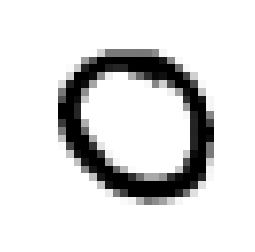

In [2]:
rand_digit = X[3000]
digit_img = rand_digit.reshape(28,28)
print(y[3000])
plt.imshow(digit_img, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Accuracy for LinearSVC: 0.9103571428571429


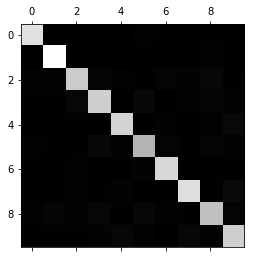

In [5]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

svm_clf = LinearSVC(random_state=42) #same as SVC with a linear kernel but LinearSVC is much faster
svm_svc = SVC(C=10, random_state=42) #SVC with rbf default kernel

#Train 
svm_clf.fit(X_train_scaled, y_train)
svm_svc.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled) #test
print("Accuracy for LinearSVC: {}".format(accuracy_score(y_pred,y_test)))

#With cross validation
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=5)
conf_mx = confusion_matrix(y_train,y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [6]:
y_pred = svm_svc.predict(X_test_scaled)
print("Accuracy for SVC_rbf: {}".format(accuracy_score(y_pred,y_test)))

#With cross validation
y_train_pred = cross_val_predict(svm_svc, X_train_scaled, y_train, cv=5) 
conf_mx = confusion_matrix(y_train,y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Accuracy for SVC_rbf: 0.9737857142857143


In [8]:
#Introducing tpot python library ---- https://github.com/EpistasisLab/tpot

from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2)
tpot.fit(X_train,y_train) #Scaling and data preprocessing is done automatically

print(tpot.score(X_test,y_test))
tpot.export('tpot_mnist_pipeline.py') #Save the corresponding python code for best pipeline as tpot_mnist_pipeline.py


"\nfrom tpot import TPOTClassifier\ntpot = TPOTClassifier(generations=5, population_size=40, verbosity=2)\ntpot.fit(X_train,y_train) #Scaling and data preprocessing is done automatically\n\nprint(tpot.score(X_test,y_test))\ntpot.export('tpot_mnist_pipeline.py') #Save the corresponding python code for best pipeline as tpot_mnist_pipeline.py\n"